In [1]:
input = input("Enter a string: ")

Enter a string:  abc


In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
import random

def generate_random_image(char):
    ascii_value = ord(char)

    if 48 <= ascii_value <= 57:
        start = ((ascii_value - 48) * 55) + 1
        end = ((ascii_value - 47) * 55)
        r = random.randint(start, end)
    elif 65 <= ascii_value <= 90:
        start = 550 + (((ascii_value - 65) * 55) + 1)
        end = 550 + ((ascii_value - 64) * 55)
        r = random.randint(start, end)
    else:
        start = 1980 + (((ascii_value - 97) * 55) + 1)
        end = 1980 + ((ascii_value - 96) * 55)
        r = random.randint(start, end)

    df = pd.read_csv('english.csv')
    return df['image'].iloc[r-1]

In [3]:
import cv2
import numpy as np

def image_to_csv(input_image_path, output_csv_path):
    # Read the image using OpenCV
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to read the image.")
        return

    # Convert the flattened array to a NumPy array
    numpy_array = np.asarray(image)

    # Save the NumPy array to a CSV file
    np.savetxt(output_csv_path, numpy_array, delimiter=",")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def csv_to_image(csv_file, output_image):
    # Read CSV file into a Pandas DataFrame
    df = pd.read_csv(csv_file)

    # Convert DataFrame to a NumPy array
    data = df.values

    # Plot the data as an image using Matplotlib
    plt.imshow(data, cmap='gray', interpolation='nearest')

    plt.axis('off')
    
    # Save the image without displaying it
    plt.savefig(output_image)

In [5]:
import pandas as pd

def append_csv_files(input_csv1, input_csv2, output_csv):
    # Read the first CSV file into a DataFrame
    df1 = pd.read_csv(input_csv1, header=None)

    # Read the second CSV file into a DataFrame
    df2 = pd.read_csv(input_csv2, header=None)

    # Concatenate the two DataFrames along the rows (axis=0)
    combined_df = pd.concat([df1, df2], axis=1)

    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv(output_csv, header=False, index=False)

In [6]:
i_1 = generate_random_image(input[0])
image_to_csv(i_1, "sam.csv")
for ch in input[1:]:
    x = generate_random_image(ch)
    image_to_csv(x, "sam1.csv")
    append_csv_files("sam.csv", "sam1.csv", "sam.csv")    

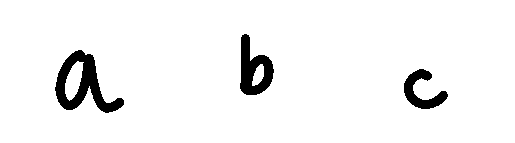

In [7]:
if __name__ == "__main__":
    csv = 'sam.csv'  # Replace with your CSV file path
    output = 'Random.png'  # Replace with desired output image path

    csv_to_image(csv, output)